# Trabajo 2, Cruce de información, gráficas e interpretación

DESCRIPTION

    Se realiza el cruce, analisis e interpretacion de la informacion proveniente de dos csv.
    Los dos csv tienen informacion correlacionada, de la cual se plantea tres preguntas primordiales.

NOTES 
    
     • N/A
    
    
CREATED_DATE
    
    2020/10/21 (YYYY/MM/DD)


AUTHOR

    Gabriel Gonzalez

 
VERSION

    Anaconda 4.7.10
    Python 3.7.6

## Extracción de datos

In [1]:
# Importacion de paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Traer datos de beers.csv
beers = pd.read_csv('beers.csv', sep=',', index_col=0)
beers

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [3]:
# Traer datos de breweries.csv
breweries = pd.read_csv('breweries.csv', sep=',', index_col=0).reset_index()
breweries

,index,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [4]:
dfMerge = beers.merge(breweries, left_on='brewery_id', right_on='index')
dfMerge = dfMerge.rename(index=str, columns={"name_x" : "beer_name", "name_y" : "breweries_name"})
dfMerge

,abv,ibu,id,beer_name,style,brewery_id,ounces,index,breweries_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,424,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,424,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,424,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,424,Wynkoop Brewing Company,Denver,CO


In [5]:
# Eliminar espacios
dfMerge['state'] = dfMerge['state'].str.lstrip()

## ¿Cuál es la cantidad de cervecerias que tiene cada estado con abv mayor a 0.08?

In [18]:
# Excluir valores con abv menores a 0.08

estados = dfMerge[dfMerge['abv'] > 0.08]
estados

,abv,ibu,id,beer_name,style,brewery_id,ounces,index,breweries_name,city,state
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0,177,18th Street Brewery,Gary,IN
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0,368,21st Amendment Brewery,San Francisco,CA
20,0.082,NaN,1592,He Said Belgian-Style Tripel,Tripel,368,12.0,368,21st Amendment Brewery,San Francisco,CA
...,...,...,...,...,...,...,...,...,...,...,...
2334,0.090,NaN,2439,Christmas Ale,Herbed / Spiced Beer,100,12.0,100,West Sixth Brewing,Lexington,KY
2360,0.082,100.0,1619,Hop Slayer Double IPA,American Double / Imperial IPA,361,12.0,361,Wild Onion Brewing Company,Lake Barrington,IL
2364,0.082,100.0,740,Hop Slayer Double IPA (2011),American Double / Imperial IPA,361,12.0,361,Wild Onion Brewing Company,Lake Barrington,IL
2365,0.082,100.0,430,Hop Slayer Double IPA (2011),American Double / Imperial IPA,361,12.0,361,Wild Onion Brewing Company,Lake Barrington,IL


In [19]:
# Agrupacion por estado
# Conteo por cervecerias
# Ordenamiento simple

estados = estados.groupby('state')['breweries_name'].count()
estados = estados.to_frame()
estados = estados.sort_values(by=['breweries_name'], ascending=False).reset_index()
print(estados.head())

  state  breweries_name
0    CO              29
1    MI              20
2    IN              18
3    CA              17
4    TX              12


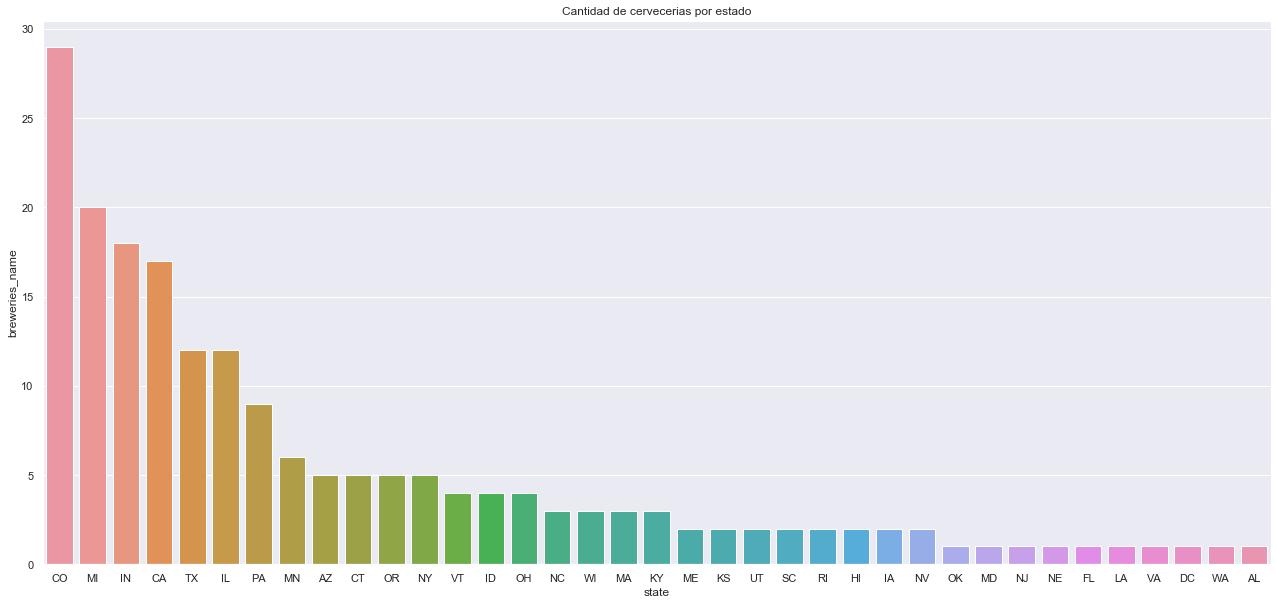

In [26]:
x = estados['state']
y = estados['breweries_name']

ptl = sns.barplot(x="state",
                  y="breweries_name",
                  data=estados).set_title("Cantidad de cervecerias por estado")

sns.set(rc={'figure.figsize':(22,10)})
# sns.barplot(x, y)
plt.show()

## Cuales son las 20 ciudades con mas cervecerias de EEUU?

In [27]:
# Agrupacion por ciudad
# Conteo por cervecerias
# Ordenamiento simple
# Top 20 y eliminacion de valores innecesarios

ciudades = dfMerge.groupby('city')['index'].count()
ciudades = ciudades.to_frame().reset_index()
ciudades = ciudades.sort_values(by=['index'], ascending=False).reset_index()
ciudades = ciudades[:20]
del ciudades['level_0']
print(ciudades.head())

           city  index
0  Grand Rapids     66
1      Portland     64
2       Chicago     55
3  Indianapolis     43
4     San Diego     42


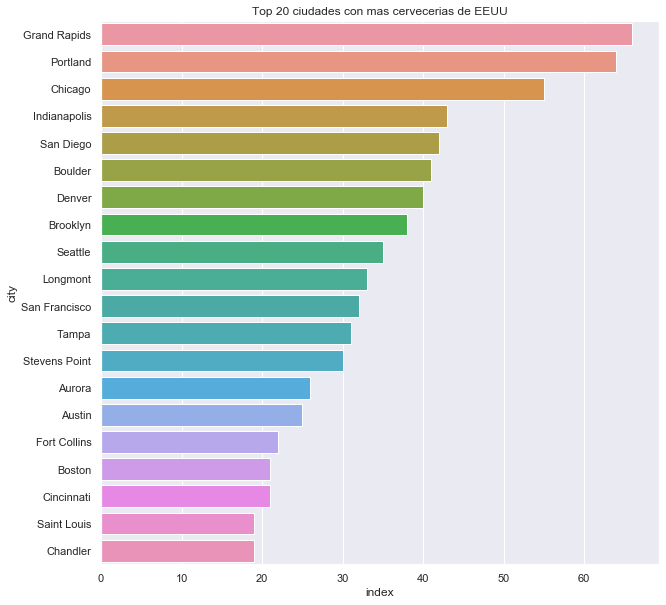

In [29]:
x = ciudades['city']
y = ciudades['index']

sns.barplot(y, x).set_title("Top 20 ciudades con mas cervecerias de EEUU")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

## Cuales son las ciudades con la cerveza mas suave del tipo Fruit / Vegetable Beer?

In [30]:
# Eliminar registros cuando ibu es null
dfIbu = dfMerge
dfIbu.drop(dfIbu[dfIbu.ibu.isnull()].index, inplace = True)

# Filtra por 'Fruit / Vegetable Beer'
dfIbu = dfMerge[dfMerge['style'] == 'Fruit / Vegetable Beer']
dfIbu.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,index,breweries_name,city,state
25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,368,21st Amendment Brewery,San Francisco,CA
26,0.049,17.0,801,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,368,21st Amendment Brewery,San Francisco,CA
27,0.049,17.0,800,21st Amendment Watermelon Wheat Beer (2006),Fruit / Vegetable Beer,368,12.0,368,21st Amendment Brewery,San Francisco,CA
38,0.049,17.0,9,Hell or High Watermelon Wheat,Fruit / Vegetable Beer,368,12.0,368,21st Amendment Brewery,San Francisco,CA
65,0.042,13.0,515,Purple Haze,Fruit / Vegetable Beer,533,12.0,533,Abita Brewing Company,Abita Springs,LA


In [31]:
# Promedio por ibu
# Ordenamiento

dfIbu = dfIbu.groupby(['city']).agg({'ibu' : 'mean'}).reset_index()
dfIbu = dfIbu.sort_values(by=['ibu'], ascending=False).reset_index()
del dfIbu['index']
dfIbu.head()

,city,ibu
0,Bucryus,24.0
1,Baton Rouge,21.0
2,York,20.0
3,South Burlington,20.0
4,Chandler,20.0


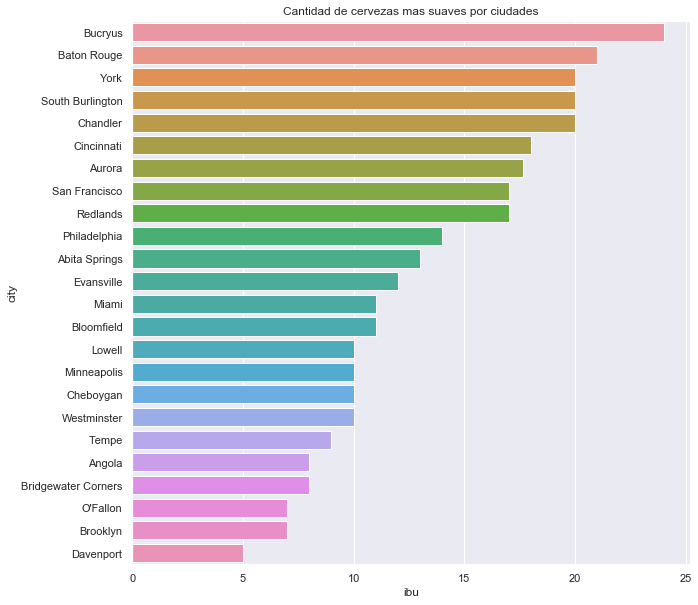

In [32]:
x = dfIbu['city']
y = dfIbu['ibu']

sns.barplot(y, x).set_title("Cantidad de cervezas mas suaves por ciudades")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

## Cual es el abv minimo que puede tener cada tipo de cerveza en el estado de California?

In [8]:
# Filtro por estado California

dfPivot = dfMerge[dfMerge['state'] == 'CA']
dfPivot.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,index,breweries_name,city,state
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0,368,21st Amendment Brewery,San Francisco,CA
20,0.082,NaN,1592,He Said Belgian-Style Tripel,Tripel,368,12.0,368,21st Amendment Brewery,San Francisco,CA
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,368,21st Amendment Brewery,San Francisco,CA
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,368,21st Amendment Brewery,San Francisco,CA
23,0.079,NaN,976,Marooned On Hog Island,American Stout,368,12.0,368,21st Amendment Brewery,San Francisco,CA


In [9]:
# Separacion de columnas

dfPivot = dfPivot[['abv', 'ibu', 'style']]
dfPivot.head()

,abv,ibu,style
19,0.082,NaN,Baltic Porter
20,0.082,NaN,Tripel
21,0.099,92.0,American Barleywine
22,0.079,45.0,Winter Warmer
23,0.079,NaN,American Stout


In [10]:
# Agrupacion por estilo de cerveza
# Se encuentra el minimo, maximo, se cuenta los valores y se encuentra la media

dfPivot = dfPivot.groupby('style').agg(['min', 'max', 'count', 'mean'])
dfPivot.head()

abv                          ibu               \
                              min    max count      mean   min    max count   
style                                                                         
American Amber / Red Ale    0.045  0.067    11  0.056545  15.0  115.0     9   
American Amber / Red Lager  0.048  0.049     2  0.048500  42.0   42.0     1   
American Barleywine         0.099  0.099     1  0.099000  92.0   92.0     1   
American Black Ale          0.068  0.075     4  0.072250  55.0   77.0     4   
American Blonde Ale         0.045  0.060     7  0.049857  16.0   25.0     5   

                                       
                                 mean  
style                                  
American Amber / Red Ale    38.666667  
American Amber / Red Lager  42.000000  
American Barleywine         92.000000  
American Black Ale          63.000000  
American Blonde Ale         19.800000

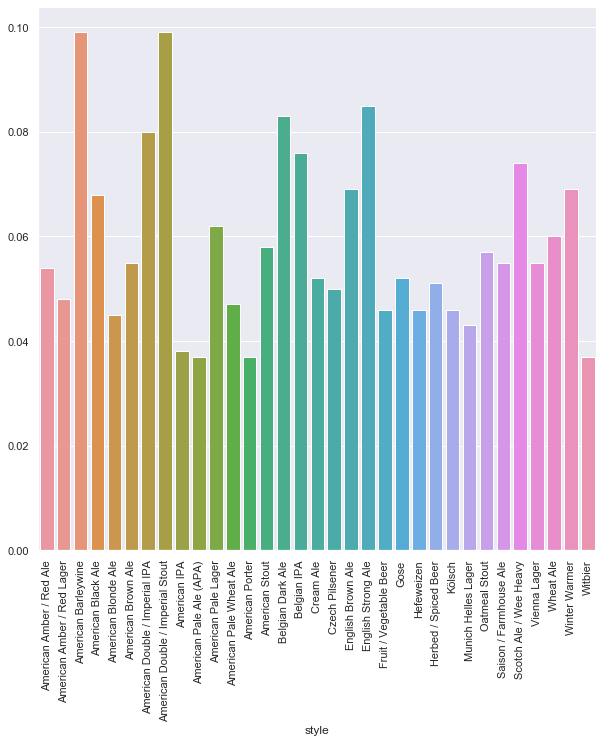

In [17]:
x = dfPivot['abv']['min'].index
y = dfPivot['abv']['min'].values

sns.barplot(x, y)
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
plt.show()